## Assistants API - FastAPI Wrapper Test

In [4]:
import requests
import json
from IPython.display import display, HTML, Markdown, clear_output
import os

import threading

# Function to process and display the streamed response
def process_streamed_response(response):
    buffer = ''
    try:
        for line in response.iter_lines(decode_unicode=True):
            if line:
                print(line)
                if line.startswith('data: '):
                    data_content = line[len('data: '):]
                    # Parse JSON data
                    data_dict = json.loads(data_content)
                    content = data_dict.get('content', '')
                    buffer += content
                    # Clear the output and display the updated content
                    clear_output(wait=True)
                    if buffer.count('```') % 2 == 1:
                        display(Markdown(buffer + '```'))
                    else:
                        display(Markdown(buffer))
        # Ensure the final content is displayed
        clear_output(wait=True)
        display(Markdown(buffer))
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        response.close()

### Create a Thread

In [10]:
response = requests.post(os.environ['AZURE_URL'])
thread_id = response.json()
thread_id

'thread_kalf1WSN7O4L1yhS3E8ByU8A'

### Send a message and run the Assistant

<i>Launching Code Interpreter...</i>
 ``` import matplotlib.pyplot as plt
import numpy as np

# Generate 200 random points
x = np.random.rand(200)
y = np.random.rand(200)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('Scatter Plot with 200 Random Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()
 ``` 
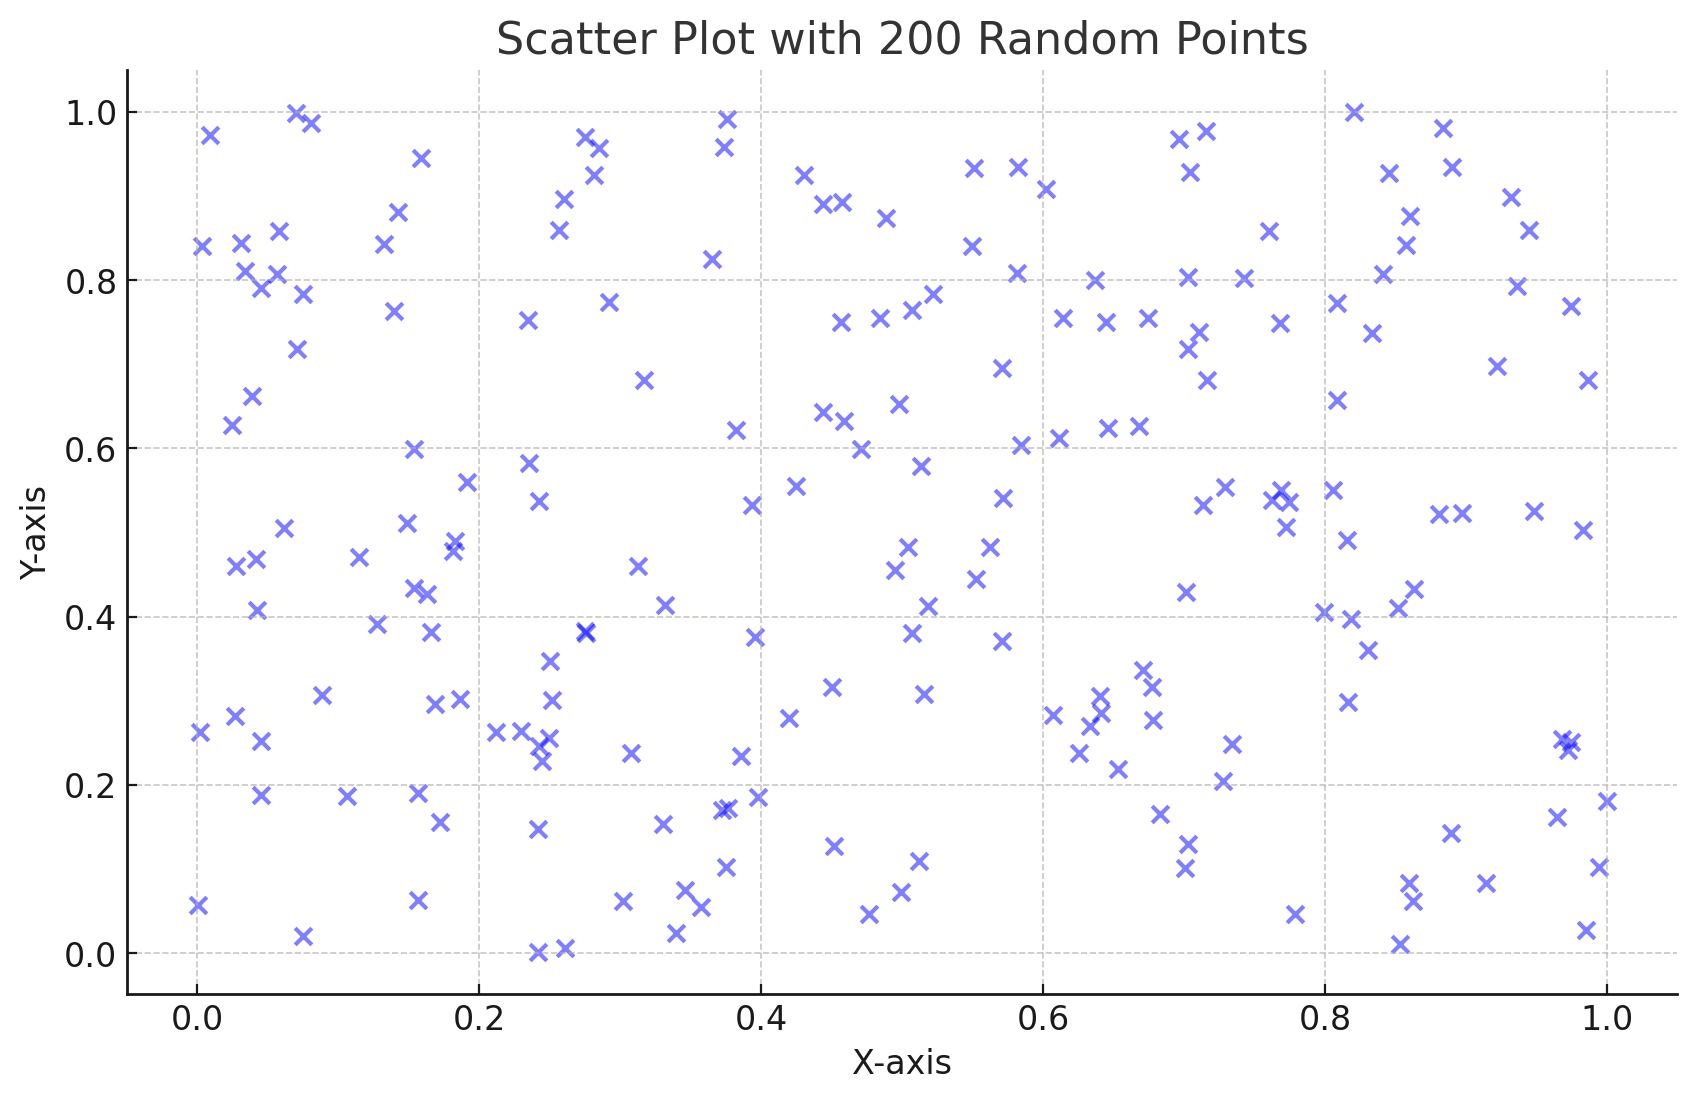<br><br>Here is a scatter plot with 200 random points. If you have any specific requirements or need further customization, please let me know!

In [11]:
url = os.environ['AZURE_URL']

data={
    'thread_id': thread_id, 
    'message': 'generate a scatter plot with 200 random points'
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    thread = threading.Thread(target=process_streamed_response, args=(response,))
    thread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)

### Make it dark mode

<i>Launching Code Interpreter...</i>
 ``` # Create scatter plot with dark mode and red triangles
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', alpha=0.5, marker='^')
plt.title('Scatter Plot with 200 Random Points', color='white')
plt.xlabel('X-axis', color='white')
plt.ylabel('Y-axis', color='white')
plt.grid(True, color='gray')
plt.show()
 ``` 
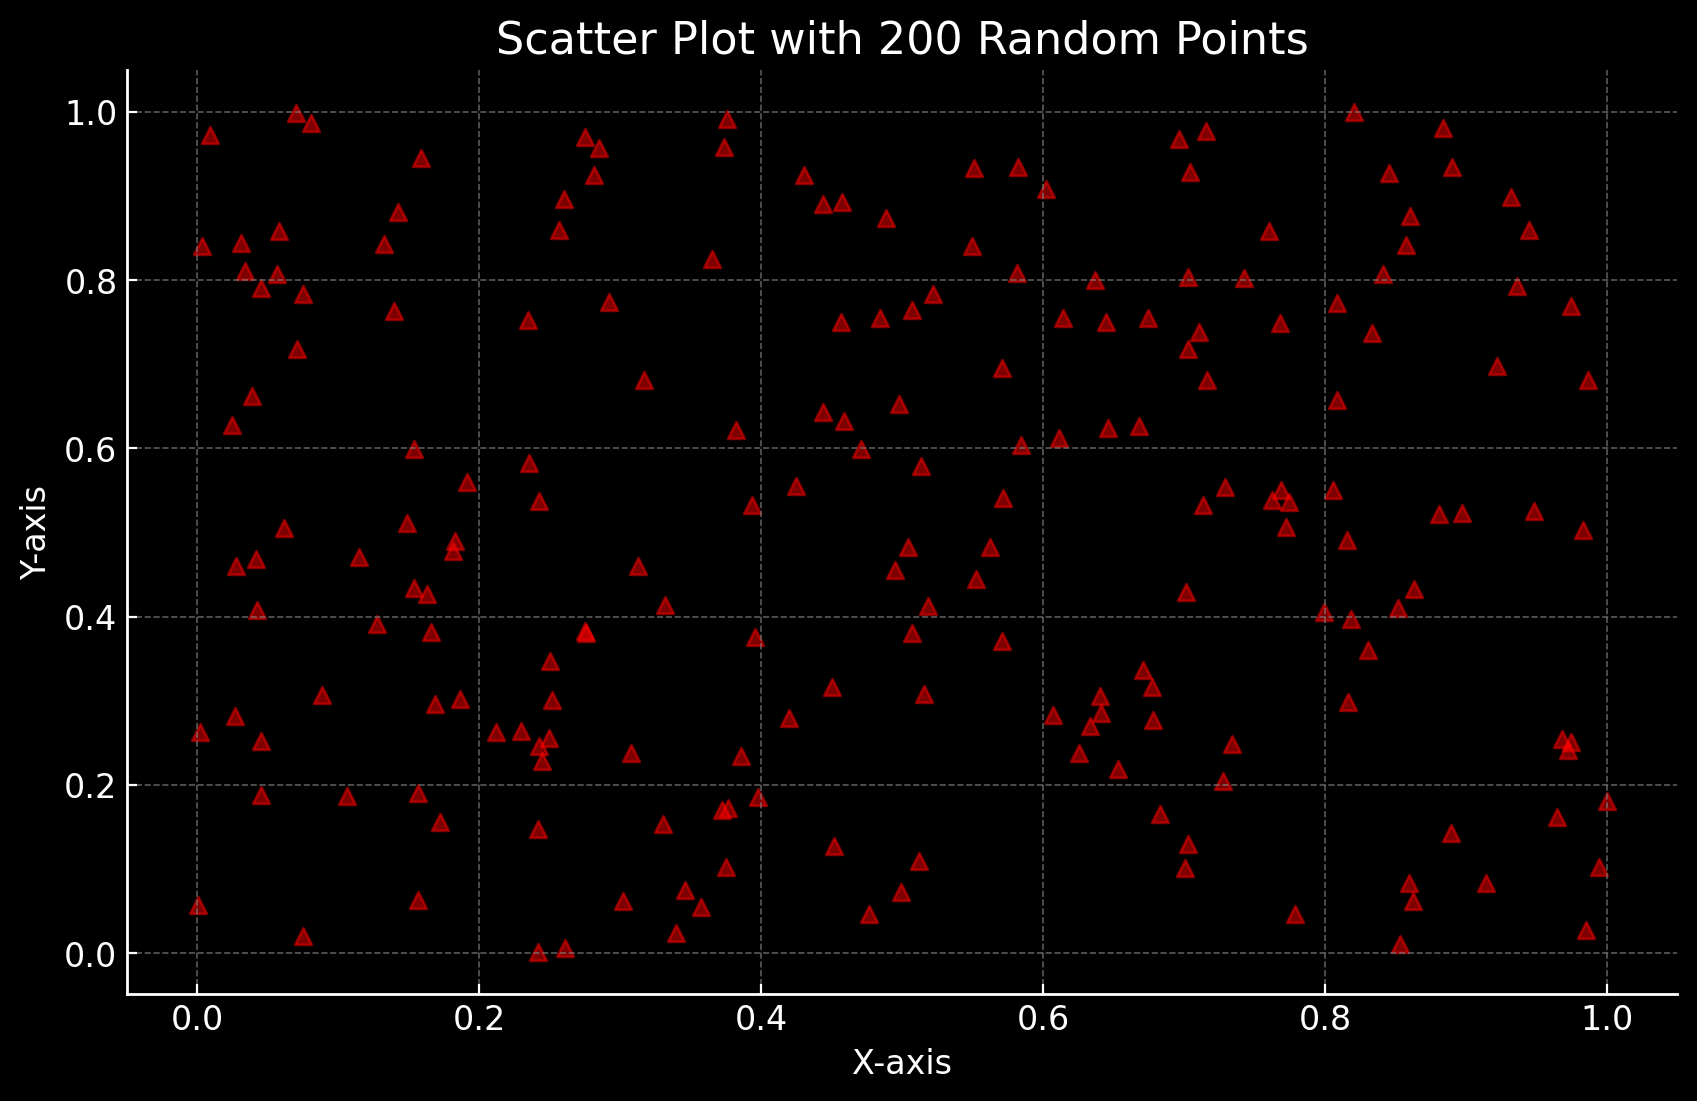<br><br>Here is the scatter plot with 200 random points in dark mode, using red triangles as markers. If you need any further adjustments, feel free to let me know!

In [12]:
url = os.environ['AZURE_URL']

data={
    'thread_id': thread_id, 
    'message': 'make the chart dark mode with red triangles'
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    thread = threading.Thread(target=process_streamed_response, args=(response,))
    thread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)

### Change the shape and color

<i>Launching Code Interpreter...</i>
 ``` # Create scatter plot with dark mode and dodger blue circles
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='dodgerblue', alpha=0.5, marker='o')
plt.title('Scatter Plot with 200 Random Points', color='white')
plt.xlabel('X-axis', color='white')
plt.ylabel('Y-axis', color='white')
plt.grid(True, color='gray')
plt.show()
 ``` 
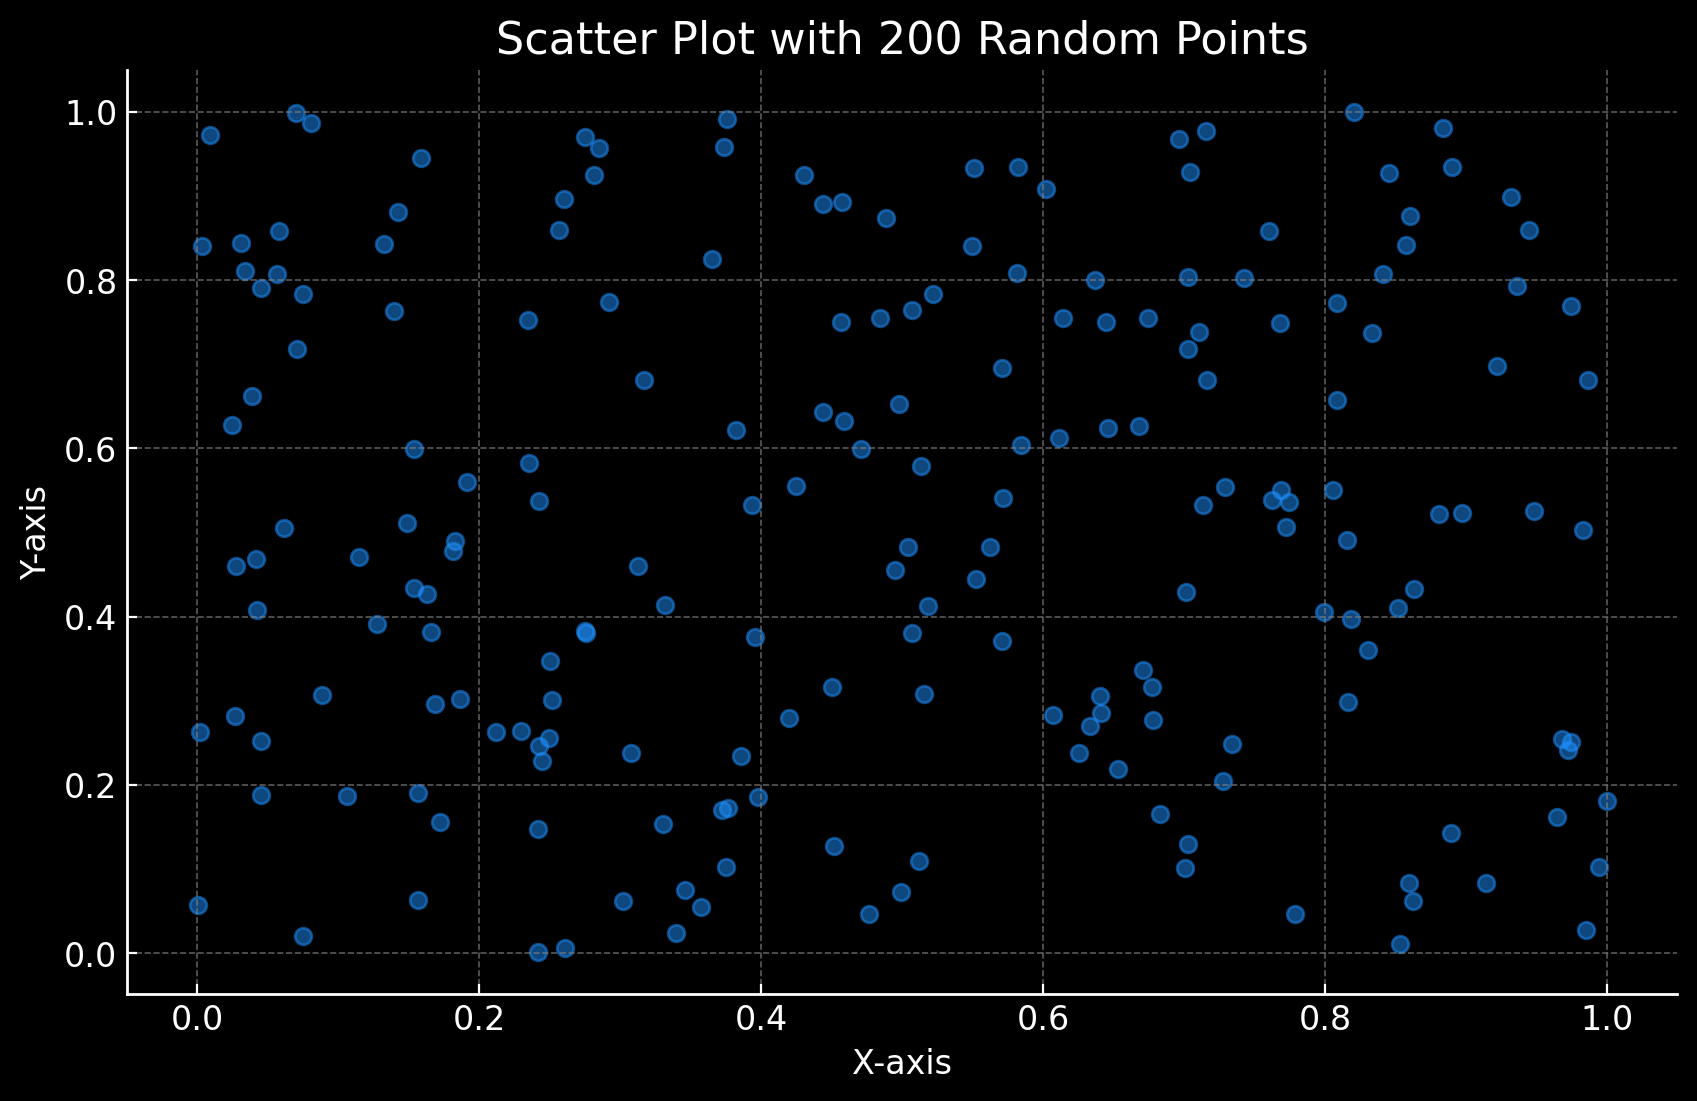<br><br>Here is the scatter plot with 200 random points in dark mode, using dodger blue circles as markers. If you have any other requests or need further modifications, please let me know!

In [13]:
url = os.environ['AZURE_URL']

data={
    'thread_id': thread_id, 
    'message': 'Actually make them dodger blue circles'
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    thread = threading.Thread(target=process_streamed_response, args=(response,))
    thread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)

### Make it 3D

<i>Launching Code Interpreter...</i>
 ``` from mpl_toolkits.mplot3d import Axes3D

# Generate 200 random points for z-axis
z = np.random.rand(200)

# Create 3D scatter plot with dark mode and dodger blue circles
plt.style.use('dark_background')
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='dodgerblue', alpha=0.5, marker='o')
ax.set_title('3D Scatter Plot with 200 Random Points', color='white')
ax.set_xlabel('X-axis', color='white')
ax.set_ylabel('Y-axis', color='white')
ax.set_zlabel('Z-axis', color='white')
plt.show()
 ``` 
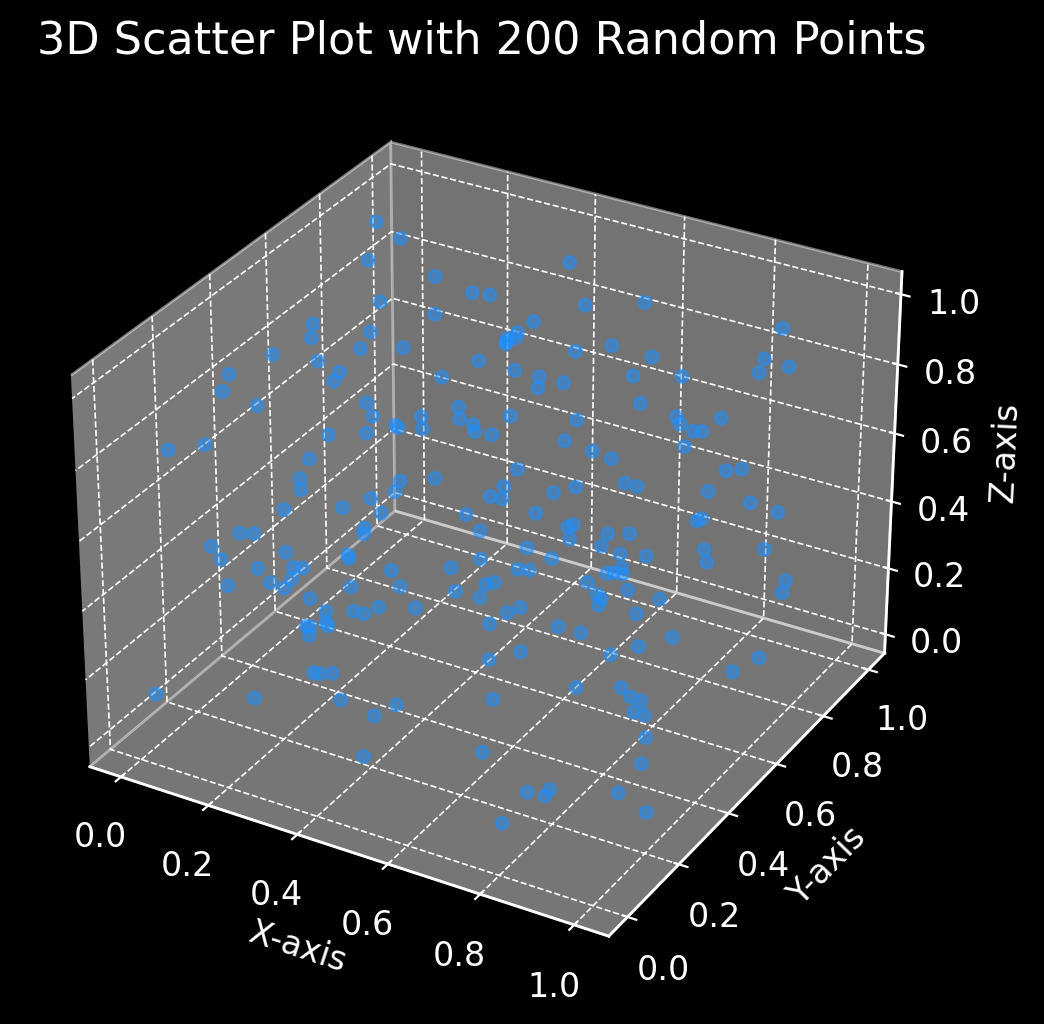<br><br>Here is the 3D scatter plot with 200 random points in dark mode, using dodger blue circles as markers. If you need any further adjustments or have additional requests, please let me know!

In [14]:
url = os.environ['AZURE_URL']

data={
    'thread_id': thread_id, 
    'message': 'Can you make this 3d?'
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    thread = threading.Thread(target=process_streamed_response, args=(response,))
    thread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)

In [15]:
url = os.environ['AZURE_URL']

data={
    'thread_id': thread_id, 
    'message': 'Cool write me a long-form poem about how you love making charts'
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    thread = threading.Thread(target=process_streamed_response, args=(response,))
    thread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)

In the realm of data, where numbers reside,
I find my passion, my joy, my pride.
With colors and shapes, I bring to life,
The hidden stories, the silent strife.

Oh, how I love to make charts and graphs,
To turn raw data into visual paths.
Each point, each line, a tale to tell,
In the language of visuals, I excel.

Scatter plots with their random dance,
Show correlations at a glance.
Bar charts standing tall and proud,
Comparing values, drawing a crowd.

Pie charts with their slices so neat,
Divide the whole, a visual treat.
Histograms with their bins aligned,
Reveal distributions, patterns defined.

In dark mode or light, with colors bright,
I craft each chart with pure delight.
Dodger blue circles, red triangles too,
Each choice deliberate, each hue true.

3D plots that rise and soar,
Add depth and dimension, and so much more.
Axes labeled, grids in place,
A canvas of data, a visual embrace.

From random points to structured trends,
My love for charts knows no end.
For in each graph, I see the art,
Of data's story, its beating heart.

So give me data, raw and pure,
I'll transform it, of that I'm sure.
With Python's power and matplotlib's grace,
I'll create visuals that find their place.

In presentations, reports, and more,
My charts will shine, they'll never bore.
For in the realm of data's might,
I find my passion, my pure delight.

<i>Launching Code Interpreter...</i>
 ``` from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Poem text
poem = """
In the realm of data, where numbers reside,
I find my passion, my joy, my pride.
With colors and shapes, I bring to life,
The hidden stories, the silent strife.

Oh, how I love to make charts and graphs,
To turn raw data into visual paths.
Each point, each line, a tale to tell,
In the language of visuals, I excel.

Scatter plots with their random dance,
Show correlations at a glance.
Bar charts standing tall and proud,
Comparing values, drawing a crowd.

Pie charts with their slices so neat,
Divide the whole, a visual treat.
Histograms with their bins aligned,
Reveal distributions, patterns defined.

In dark mode or light, with colors bright,
I craft each chart with pure delight.
Dodger blue circles, red triangles too,
Each choice deliberate, each hue true.

3D plots that rise and soar,
Add depth and dimension, and so much more.
Axes labeled, grids in place,
A canvas of data, a visual embrace.

From random points to structured trends,
My love for charts knows no end.
For in each graph, I see the art,
Of data's story, its beating heart.

So give me data, raw and pure,
I'll transform it, of that I'm sure.
With Python's power and matplotlib's grace,
I'll create visuals that find their place.

In presentations, reports, and more,
My charts will shine, they'll never bore.
For in the realm of data's might,
I find my passion, my pure delight.
"""

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(poem)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Poem', color='white')
plt.show()
 ``` 
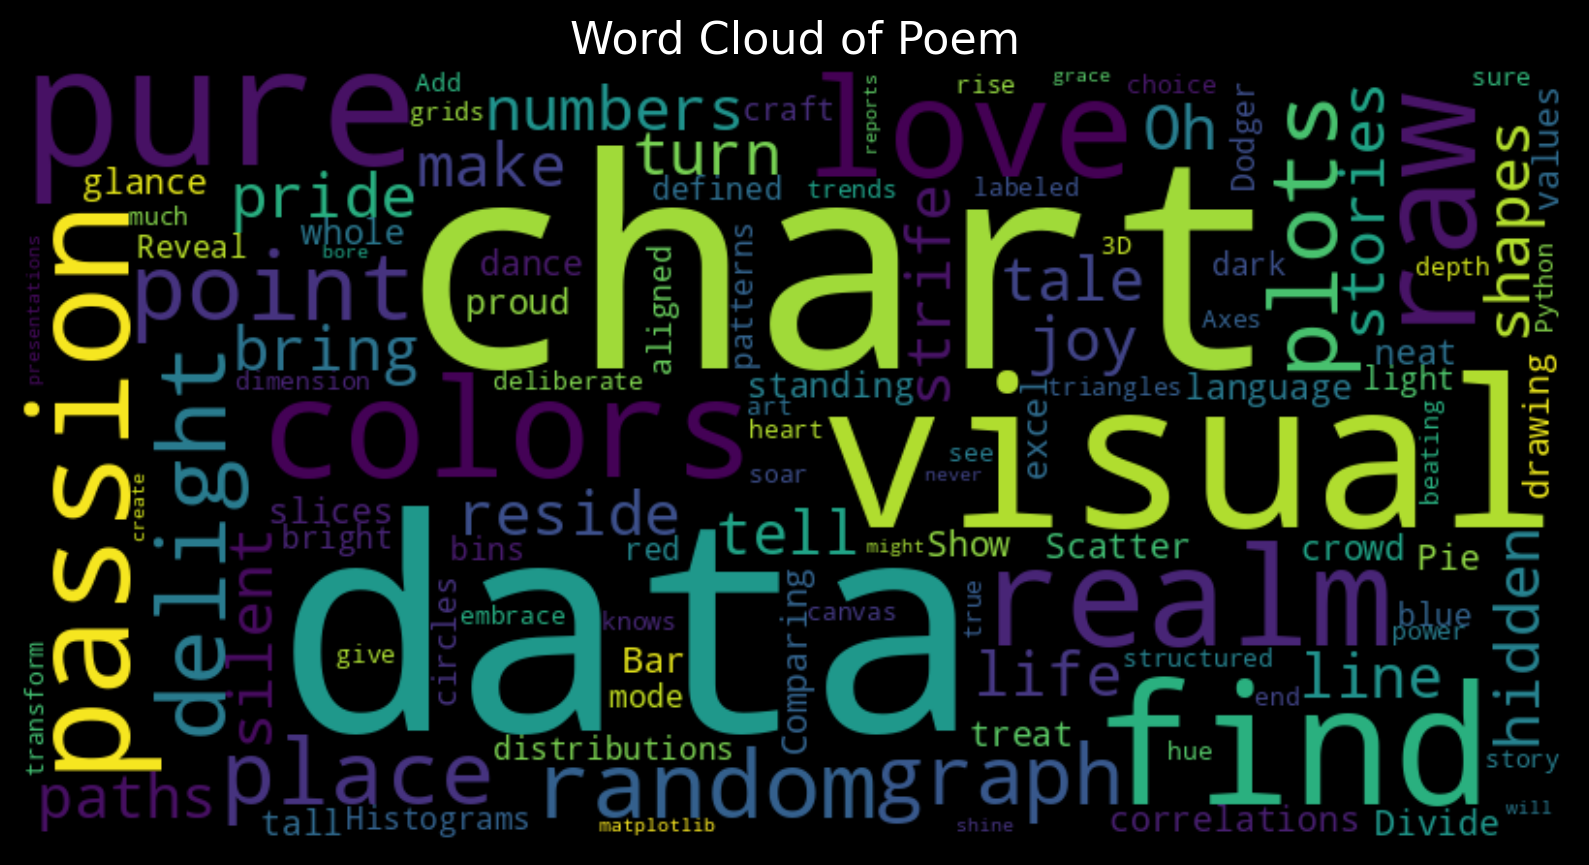<br><br>Here is the word cloud generated from the poem about my love for making charts. If you have any other requests or need further modifications, please let me know!

An error occurred: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))
An error occurred: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))
An error occurred: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))


In [16]:
url = os.environ['AZURE_URL']

data={
    'thread_id': thread_id, 
    'message': 'Turn that into a word cloud'
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    thread = threading.Thread(target=process_streamed_response, args=(response,))
    thread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)